<a href="https://colab.research.google.com/github/sethorus30/Data-Science/blob/master/Tweepy_Deeplearning_NLP_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 38.6 MB/s 


In [ ]:
pip install git+https://github.com/PythonCharmers/starborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PythonCharmers/starborn to /tmp/pip-req-build-87u8s67e
  Running command git clone -q https://github.com/PythonCharmers/starborn /tmp/pip-req-build-87u8s67e
  Created wheel for starborn: filename=starborn-0.1-py3-none-any.whl size=5339 sha256=5e8a99d7344141a76d1747f6daded7546fa15b905eb275a467a3be7d0bf15508
  Stored in directory: /tmp/pip-ephem-wheel-cache-_c562972/wheels/18/c1/32/c448e13787568acf642c504767453221cf0cae90d8c8266e4c
Successfully built starborn


In [ ]:
pip install preaty pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement preaty (from versions: none)
ERROR: No matching distribution found for preaty


In [ ]:
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
import scipy.stats as st
import altair as alt
import matplotlib.pyplot as plt
import textstat


# Packages for data preparation
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.corpus import webtext
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import svm
import os

from scipy.sparse import lil_matrix
from sklearn.metrics import fbeta_score
#Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
#Thresh
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
#Random Forest
from sklearn.metrics import mean_squared_error

In [ ]:
nltk.download('webtext')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#work on the data story, what are people upset and which , focus on Navies Bayes go back to the Navies Bayes homework

In [ ]:
NB_WORDS = 10005  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

We read in the csv with the tweets data and perform a random shuffle. It's a good practice to shuffle the data before splitting between a train and test set. That way the sentiment classes are equally distributed over the train and test sets.

We'll only keep the text column as input and the airline_sentiment column as the target.


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Copy of Tweets.csv to Copy of Tweets.csv


# Data Preparation

In [ ]:
#df = pd.read_csv('../input/Tweets.csv')
df = pd.read_csv('Copy of Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment', 'negativereason', 'airline']]
df.head()

text airline_sentiment  \
11954  @AmericanAir Would love to DM you, but my Twit...           neutral   
690    @united kudos for not Cancelled Flightling fli...          positive   
10341  @USAirways I have been on hold for over one ho...          negative   
4564   @SouthwestAir hope your flyers get a credit of...          negative   
14536  @AmericanAir @russelneiss No, American. This i...          negative   

               negativereason     airline  
11954                     NaN    American  
690                       NaN      United  
10341  Customer Service Issue  US Airways  
4564         Cancelled Flight   Southwest  
14536  Customer Service Issue    American

In [ ]:
selection = alt.selection(type='interval')

In [ ]:
df['negativereason'] = df['negativereason'].dropna()

In [ ]:
df = df.dropna()

In [ ]:
df.negativereason.fillna(0)

9515               Lost Luggage
8782     Customer Service Issue
5947               Lost Luggage
13529    Customer Service Issue
160                 Late Flight
                  ...          
10928               Late Flight
14608          Cancelled Flight
677                  Bad Flight
11381    Customer Service Issue
10165          Cancelled Flight
Name: negativereason, Length: 9178, dtype: object

In [ ]:
df['negativereason'] = df['negativereason'].replace(np.nan, 'not known' )

In [ ]:
alt.Chart(df).mark_bar(size=30).encode(
    x="airline",
    y=alt.Y('count(negativereason)', stack="normalize", axis=alt.Axis(format='%')),
    color=alt.Color('negativereason', sort='ascending'),
        order=alt.Order('count(negativereason):Q', sort='descending')
).properties(width=400)
#convert them all to lower case 
#make a list of the ones that you want to use that 
#get rid of unknown , just for this chart 

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_bar(size=30).encode(
    x="airline",
    y=alt.Y('count(negativereason)', stack="normalize", axis=alt.Axis(format='%')),
    color=alt.Color('negativereason', sort='ascending'),
        order=alt.Order('count(negativereason):Q', sort='descending')
).properties(width=400)
#convert them all to lower case 
#make a list of the ones that you want to use that 
#get rid of unknown , just for this chart 

In [ ]:
#adjust words for how many times they appear in the document 
text = df['text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Streaming output truncated to the last 5000 lines.
@JetBlue toss this ticket...it's great PR and I'm sure every college student following me will be willing to rock out wit too 👀👀
@americanair why am I not being given a callback option??! Why has this service been turned off?
@VirginAmerica Man of steel flies to more cities though...and with more frequency too.
@united switched to fly united from delta for the past two trips and was very disappointed. Now my UA4646 on 2/23 is delayed by 3 hours!!
@USAirways can you DM me &amp; add me to the upgrade list for a flt tonight?
@United just played the Most bizarre "safety" video I've ever seen... http://t.co/Hlm2Oks6xl
@JetBlue its always a pleasure ☺️
@USAirways sad experience today on 4663.  Family on Southwest direct to MCO. My loyalty to USAir = not vacationing with my boys today.
@SouthwestAir Please lower my plane flight by like $100 bucks!! Thanks~ #FloridaVacation
@VirginAmerica I tried that. You offered to charge me an additional $1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df['Text_Length'] = df.text.apply(lambda x: len(x))

In [ ]:
df['#_capital_leters'] = df['text'].str.findall(r'[A-Z]').str.len()

In [ ]:
df['percentage_of_capital_letters'] = df['#_capital_leters']/df['Text_Length']

In [ ]:
df['Greater_than_50%_capital_letters'] = df['percentage_of_capital_letters'].apply(lambda x:  x>= .5 )

In [ ]:
df['Greater_than_50%_capital_letters'] = df['Greater_than_50%_capital_letters'].astype(int)

In [ ]:
df['reading_level'] = df['text'].apply(lambda x :textstat.flesch_reading_ease(x))

In [ ]:
df.describe()

Text_Length  #_capital_leters  percentage_of_capital_letters  \
count  14640.000000      14640.000000                   14640.000000   
mean     103.822063          5.917008                       0.061368   
std       36.277339          4.934437                       0.053529   
min       12.000000          0.000000                       0.000000   
25%       77.000000          3.000000                       0.031250   
50%      114.000000          5.000000                       0.050000   
75%      136.000000          8.000000                       0.076923   
max      186.000000        103.000000                       0.750000   

       Greater_than_50%_capital_letters  reading_level  
count                      14640.000000   14640.000000  
mean                           0.002459      70.741748  
std                            0.049529      21.618128  
min                            0.000000    -218.200000  
25%                            0.000000      61.330000  
50%                            0.000000      74.050000  
75%                            0.000000      84.680000  
max                            1.000000     115.130000

In [ ]:
df[['reading_level']].describe()

reading_level
count   14640.000000
mean       70.741748
std        21.618128
min      -218.200000
25%        61.330000
50%        74.050000
75%        84.680000
max       115.130000

In [ ]:
df

text airline_sentiment  \
3961   @united I've been waiting on my bag in IAH for...          negative   
7439   @JetBlue flight from BOS - RSW tomorrow, all i...          negative   
2465   @United had a maintenance issue. Stuck in Gene...          negative   
13884                    @AmericanAir Great - thank you.          positive   
10689  @USAirways Can you help me add a AAdvantage nu...           neutral   
...                                                  ...               ...   
6795   @JetBlue I appreciate the credit for my troubl...          negative   
1203   @united Please msg me a # for customer service...          negative   
14136  @AmericanAir I’ve been on the line waiting for...          negative   
5334   @SouthwestAir trying to rebook flight. On hold...          negative   
463    @VirginAmerica another perfect flight.   How c...          positive   

                negativereason         airline  Text_Length  #_capital_leters  \
3961              Lost Luggage          United          131                 6   
7439   Flight Booking Problems           Delta          121                 8   
2465                Bad Flight          United          125                 6   
13884                      NaN        American           31                 3   
10689                      NaN      US Airways           94                 6   
...                        ...             ...          ...               ...   
6795    Customer Service Issue           Delta           95                 3   
1203    Customer Service Issue          United          140                 2   
14136   Customer Service Issue        American           64                 3   
5334    Customer Service Issue       Southwest          139                10   
463                        NaN  Virgin America          133                 4   

       percentage_of_capital_letters  Greater_than_50%_capital_letters  \
3961                        0.045802                                 0   
7439                        0.066116                                 0   
2465                        0.048000                                 0   
13884                       0.096774                                 0   
10689                       0.063830                                 0   
...                              ...                               ...   
6795                        0.031579                                 0   
1203                        0.014286                                 0   
14136                       0.046875                                 0   
5334                        0.071942                                 0   
463                         0.030075                                 0   

       reading_level  
3961           84.68  
7439           73.51  
2465           69.28  
13884          75.88  
10689          55.24  
...              ...  
6795           55.24  
1203           91.61  
14136          77.23  
5334           44.91  
463            72.83  

[14640 rows x 9 columns]

'😂': 'face with tears of joy'}                                      21
{'👍': 'thumbs up'}                                                   20
{'😊': 'smiling face with smiling eyes'}                              19
{'😡': 'pouting face'}                                                16

In [ ]:
df

text airline_sentiment  \
3121   Really? 9+hours???? @united: @JenniferWalshPR ...          negative   
12048  @AmericanAir aa employees were rude and unwill...          negative   
12316  @AmericanAir I need to go to YYZ tmr morning 8...          negative   
10277  @USAirways I have been on hold for 4 hours my ...          negative   
3780   @united yep, after long waiting on the phone w...          negative   
...                                                  ...               ...   
10946  @USAirways hi is there somebody avail who can ...          negative   
2382                @united I'm flying UA but *G with A3           neutral   
4919   @SouthwestAir got it.  Next time I will know a...           neutral   
13327  @AmericanAir I can't!!!  No one can't get to "...          negative   
6748                @JetBlue flight 1041 to Savannah, GA           neutral   

                    negativereason     airline  Text_Length  #_capital_leters  \
3121                   Late Flight      United          131                11   
12048  Flight Attendant Complaints    American          139                 3   
12316                 Lost Luggage    American          121                10   
10277       Customer Service Issue  US Airways          130                 4   
3780       Flight Booking Problems      United          121                 2   
...                            ...         ...          ...               ...   
10946       Customer Service Issue  US Airways          137                 5   
2382                           NaN      United           36                 5   
4919                           NaN   Southwest           83                 6   
13327       Customer Service Issue    American          127                16   
6748                           NaN       Delta           36                 5   

       percentage_of_capital_letters  Greater_than_50%_capital_letters  \
3121                        0.083969                                 0   
12048                       0.021583                                 0   
12316                       0.082645                                 0   
10277                       0.030769                                 0   
3780                        0.016529                                 0   
...                              ...                               ...   
10946                       0.036496                                 0   
2382                        0.138889                                 0   
4919                        0.072289                                 0   
13327                       0.125984                                 0   
6748                        0.138889                                 0   

       reading_level  
3121           76.72  
12048          59.80  
12316          92.63  
10277          69.45  
3780           97.20  
...              ...  
10946          87.72  
2382           88.74  
4919           88.74  
13327          82.81  
6748           73.85  

[14640 rows x 9 columns]

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

#df = pd.DataFrame( columns= 'text')
df['text_lemmatized'] = df.text.apply(lambda x: lemmatize_text(x))

In [ ]:
df.loc[df['text'].str.contains("ing"),'text']

11954    @AmericanAir Would love to DM you, but my Twit...
690      @united kudos for not Cancelled Flightling fli...
10341    @USAirways I have been on hold for over one ho...
3853     @united You please do not burn my dreams !!!  ...
3672     @united I just sent a long note with some sugg...
                               ...                        
441      @VirginAmerica can we make every VX plane with...
13980    @AmericanAir gotta be worse than @delta w/ on ...
4116     @united A 3rd party service you use to sell yo...
4417     @SouthwestAir if you're going to charge for wi...
10861    @USAirways the two women workng PHL bag check ...
Name: text, Length: 6238, dtype: object

In [ ]:
df['text_lemmatized'].to_csv('name.csv', index =  False)

In [ ]:
lemmatizer=WordNetLemmatizer()
for word in df['text']:
    print(lemmatizer.lemmatize(word))

Streaming output truncated to the last 5000 lines.
@United why can't you have an English/Spanish rep call me so we can locate my bag and resolve this issue?
@united yes, computer would allow me to get to San Diego quick but customer service will not help.  Says can't rebook http://t.co/KcVUbUYExc
@AmericanAir  is the worst airline to ever travel with!!!! The worst!! They're equivalent to DIRT!!!!!!
@AmericanAir you have the worst reps at Jacksonville airport. So rude and totally not helpful at all!
@JetBlue Is there an issue with your website and logging on? (App too?) I know I am entering info correctly but cannot sign in! :(
@JetBlue So anything found while cleaning the plane in DC would be at the baggage office, even something small?
@SouthwestAir thanks for the drink tickets hook up! Can't wait for my first international flight with you to NAS! #pumped
@united its funny how none of ur tweets back are helpful what I want is to read 'ya we'll change that so our customers get better s

In [ ]:
X_train_rest

NameError: ignored

Data Cleaning

In [ ]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

text airline_sentiment  \
11954   Would love DM you, Twitter app says not follo...           neutral   
690     kudos not Cancelled Flightling flights DFW mo...          positive   
10341   hold one hour waiting reschedule flight. How ...          negative   
4564    hope flyers get credit sort delays Cancelled ...          negative   
14536    No, American. This simple. How YOU call HER ...          negative   

               negativereason     airline  Text_Length  #_capital_leters  \
11954                     NaN    American           95                 7   
690                       NaN      United          108                 6   
10341  Customer Service Issue  US Airways          113                 6   
4564         Cancelled Flight   Southwest          129                 4   
14536  Customer Service Issue    American          140                13   

       percentage_of_capital_letters  Greater_than_50%_capital_letters  \
11954                       0.073684                                 0   
690                         0.055556                                 0   
10341                       0.053097                                 0   
4564                        0.031008                                 0   
14536                       0.092857                                 0   

       reading_level                                    text_lemmatized  
11954          78.59  [@AmericanAir, Would, love, to, DM, you,, but,...  
690            71.82  [@united, kudos, for, not, Cancelled, Flightli...  
10341          94.66  [@USAirways, I, have, been, on, hold, for, ove...  
4564           52.19  [@SouthwestAir, hope, your, flyer, get, a, cre...  
14536          74.05  [@AmericanAir, @russelneiss, No,, American., T...

In [ ]:
df.loc[:,["text","reading_level", "Text_Length", "#_capital_leters", "Greater_than_50%_capital_letters"]]

text  reading_level  \
11954   Would love DM you, Twitter app says not follo...          78.59   
690     kudos not Cancelled Flightling flights DFW mo...          71.82   
10341   hold one hour waiting reschedule flight. How ...          94.66   
4564    hope flyers get credit sort delays Cancelled ...          52.19   
14536    No, American. This simple. How YOU call HER ...          74.05   
...                                                  ...            ...   
2057    customer service unbelievably bad. Abysmal. I...          96.89   
4116    3rd party service use sell tickets ripped off...          69.79   
8817                                  Always happy help!          31.55   
4417    going charge wifi, us solid make sure take le...          76.90   
10861   two women workng PHL bag check term 11:30 ET ...          72.50   

       Text_Length  #_capital_leters  Greater_than_50%_capital_letters  
11954           95                 7                                 0  
690            108                 6                                 0  
10341          113                 6                                 0  
4564           129                 4                                 0  
14536          140                13                                 0  
...            ...               ...                               ...  
2057           137                 3                                 0  
4116           113                 3                                 0  
8817            47                 6                                 0  
4417           137                 2                                 0  
10861          140                 9                                 0  

[14640 rows x 5 columns]

# Modeling Section

Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

#MAKE DEEP LEARNING MODEL FOR EACH AIRLINE 

#just mentioned the features that I choose 

# Train data samples: 13176
# Test data samples: 1464


Converting words to numbers

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10005 words in dictionary
Top 5 most common words are: [('flight', 3534), ('not', 1422), ('no', 1363), ('get', 1209), ('t', 1092)]


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

" So anything found cleaning plane DC would baggage office, even something small?" is converted into [157, 214, 346, 3430, 21, 502, 27, 112, 962, 68, 340, 836]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[157, 214, 346, 3430, 21, 502, 27, 112, 962, 68, 340, 836]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 12.0 features with a value of 1.


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 

def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

" So anything found cleaning plane DC would baggage office, even something small?" is converted into [157, 214, 346, 3430, 21, 502, 27, 112, 962, 68, 340, 836]
"[157, 214, 346, 3430, 21, 502, 27, 112, 962, 68, 340, 836]" is converted into [0. 0. 0. ... 0. 0. 0.]
For this example we have 12.0 features with a value of 1.


In [ ]:
X_train_w_features = pd.DataFrame(X_train_oh)
X_train_w_features["percentage_of_capital_letters"] = df.loc[X_train.index, ["percentage_of_capital_letters"]]
#do this for test data set, leave y test and train alone 

In [ ]:
X_train_w_features["#_capital_leters"] = df.loc[X_train.index, ["#_capital_leters"]]

In [ ]:
X_train_w_features["Text_Length"] = df.loc[X_train.index, ["Text_Length"]]

In [ ]:
X_train_w_features["Greater_than_50%_capital_letters"] = df.loc[X_train.index, ["Greater_than_50%_capital_letters"]]

In [ ]:
X_train_w_features["reading_level"] = df.loc[X_train.index, ["reading_level"]]

In [ ]:
X_test_w_features = pd.DataFrame(X_test_oh)
X_test_w_features["Text_Length"] = df.loc[X_test.index, ["Text_Length"]]

In [ ]:
X_test_w_features["reading_level"] = df.loc[X_test.index, ["reading_level"]]

In [ ]:
X_test_w_features["#_capital_leters"] = df.loc[X_test.index, ["#_capital_leters"]]

In [ ]:
X_test_w_features["percentage_of_capital_letters"] = df.loc[X_test.index, ["percentage_of_capital_letters"]]

In [ ]:
X_test_w_features["Greater_than_50%_capital_letters"] = df.loc[X_test.index, ["Greater_than_50%_capital_letters"]]

In [ ]:
X_test_w_features = X_test_w_features.fillna(0)

In [ ]:
X_train_w_features = X_train_w_features.fillna(0)

In [ ]:
df.loc[X_train.index, ["percentage_of_capital_letters"]]

percentage_of_capital_letters
8213                        0.045045
543                         0.015152
11643                       0.076923
6083                        0.045872
2962                        0.000000
...                              ...
2987                        0.042553
10798                       0.034783
8033                        0.071429
6753                        0.075949
10193                       0.053030

[13176 rows x 1 columns]

Converting the target classes to numbers

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [ ]:
#X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

#assert X_valid.shape[0] == y_valid.shape[0]
#assert X_train_rest.shape[0] == y_train_rest.shape[0]

#print('Shape of validation set:',X_valid.shape)

In [ ]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_w_features, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)


Shape of validation set: (1318, 10010)


In [ ]:
NB_WORDS = 10010  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [ ]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()
#just creating the base model , 2 layer deep learning model. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640704    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model

In [ ]:
from tensorflow.keras import backend as K

In [ ]:
from keras import metrics

In [ ]:
#do regular f1

In [ ]:
X_train_rest.shape

(11858, 10010)

In [ ]:
y_train_rest.shape

(11858, 3)

In [ ]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=[ 'accuracy']) #balance accur, f1 macro

                  #model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=[custom_f1, 'accuracy']) 
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [ ]:
base_history = deep_model(base_model)

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

In [ ]:
plt.style.use('ggplot')

In [ ]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

e can see here that the validation loss starts to increase as from epoch 4. The training loss continues to lower, which is normal as the model is trained to fit the train data as good as possible.

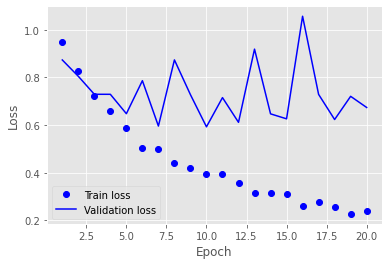

In [ ]:
eval_metric(base_history, 'loss')
#part of the reason for the distribution is due to filling all the nans with zero 
# the fact the validation loss is greater than the train loss is proof that this is a valid model

Just as with the validation loss, the validation accuracy peaks at an early epoch. After that, it goes down slightly. So to conclude, we can say that the model starts overfitting as from epoch 4.

Handling overfitting

Now, we can try to do something about the overfitting. There are different options to do that.

Option 1: reduce the network's size by removing layers or reducing the number of hidden elements in the layers
Option 2: add regularization, which comes down to adding a cost to the loss function for large weights
Option 3: adding dropout layers, which will randomly remove certain features by setting them to zero

Reducing the network's size
We reduce the network's size by removing one layer and lowering the number of hidden elements in the remaining layer to 32.

In [ ]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()
#creating the reduced model was to deal with overfitting 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320352    
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 320,451
Trainable params: 320,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reduced_history = deep_model(reduced_model)

In [ ]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.xlabel('Epoch')
    plt.ylabel("loss")
    plt.legend()
    plt.show()

We can see that it takes more epochs before the reduced model starts overfitting (around epoch 10). Moreover, the loss increases much slower after that epoch compared to the baseline model.

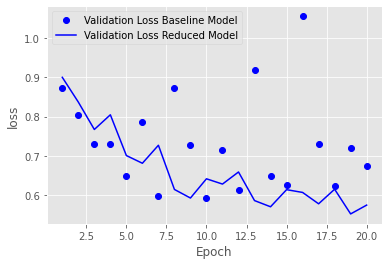

In [ ]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')
#validation loss in reduced model is less overall 

Adding regularization
To address overfitting, we can also add regularization to the model. Let's try with L2 regularization.

In [ ]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640704    
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reg_history = deep_model(reg_model)

For the regularized model we notice that it starts overfitting earlier than the baseline model. However, the loss increases much slower afterwards.

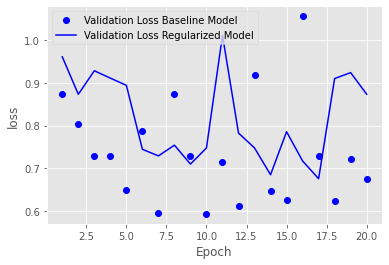

In [ ]:
compare_loss_with_baseline(reg_history, 'Regularized Model')
#Validation loss for both models are very close by the end 

Adding dropout layers
The last option we'll try is to add dropout layers.

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()
#the drop model and reg model and reduced model is all to deal with the overfitting 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640704    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 645,059
Trainable params: 645,059
Non-trainable params: 0
_________________________________________________________________


In [ ]:
drop_history = deep_model(drop_model)

The model with dropout layers starts overfitting a bit later than the baseline model. The loss also increases slower than the baseline model.

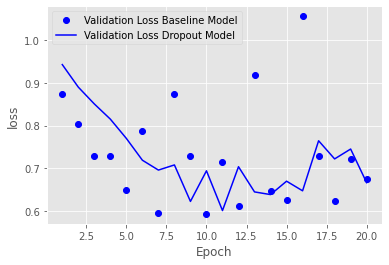

In [ ]:
compare_loss_with_baseline(drop_history, 'Dropout Model')
#validation loss is still going down but now it is starting to match the baseline model

In [ ]:
import tensorflow as tf


In [ ]:
base_model.save('base_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('base_model.h5')

In [ ]:
new_model =  tf.keras.models.model_from_config('base_model.h5')

ValueError: ignored

In [ ]:
import tweepy

In [ ]:
api_key= "1wwBNBurlszabx6uF8ooWlPu8"
api_key_secret = "9h1n3lNaGb6E56z6WDC388Hc7M2i94hXKC6tyqtlVCmNIohGji"

In [ ]:
bearer_token = "AAAAAAAAAAAAAAAAAAAAAKVmZQEAAAAAW5GroVkr0Bc2KgZpcy%2FjSS3Kuto%3DI9idtho2UbI7hVTjrs3sOrYWh6PKm8XBEh6ZkjypaUucsxTsWy"

In [ ]:
access_token = "1492574308341731331-7DqS91z2OSWmRd2BWjiztmwJ7eJQE8"
secret_access_token = "ruXnomsFMpLzObj5Ya1wxO2y7qG6TyAnoejnbPwqluvZ3"

In [ ]:
username = 'united'

In [ ]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, secret_access_token)
api = tweepy.API(auth)

In [ ]:
queryTopic = '@united'

In [ ]:
tweets = [tweet for tweet in tweepy.Cursor(api.search, q = queryTopic, lang= 'en', result_type = "mixed", count = 200).items(200)]

In [ ]:
tweets

[Status(_api=<tweepy.api.API object at 0x7f8da510a750>, _json={'created_at': 'Tue Jun 14 18:02:00 +0000 2022', 'id': 1536770946186596352, 'id_str': '1536770946186596352', 'text': 'last road trip of the season \n\n@united || ✈️ https://t.co/3xHXZfOb4K', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'united', 'name': 'United Airlines', 'id': 260907612, 'id_str': '260907612', 'indices': [31, 38]}], 'urls': [], 'media': [{'id': 1536770927576350720, 'id_str': '1536770927576350720', 'indices': [45, 68], 'media_url': 'http://pbs.twimg.com/media/FVO1BDdWAAAKi-e.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FVO1BDdWAAAKi-e.jpg', 'url': 'https://t.co/3xHXZfOb4K', 'display_url': 'pic.twitter.com/3xHXZfOb4K', 'expanded_url': 'https://twitter.com/warriors/status/1536770946186596352/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 819, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 819, 'h':

In [ ]:
df_user_tweets = pd.DataFrame()
try:     

    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_user_tweets = df_user_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url'],
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [ ]:
df_user_tweets

Created at       User ID              User Name  \
0    Tue Jun 14 18:02:00 +0000 2022  1.536771e+18  Golden State Warriors   
1    Tue Jun 14 20:15:03 +0000 2022  1.536804e+18  Golden State Warriors   
2    Mon Jun 13 19:00:01 +0000 2022  1.536423e+18      Attitude Magazine   
3    Wed Jun 15 17:18:15 +0000 2022  1.537122e+18                     수영   
4    Wed Jun 15 17:15:57 +0000 2022  1.537122e+18              GO BLUE!!   
..                              ...           ...                    ...   
195  Mon Jun 13 18:12:14 +0000 2022  1.536411e+18                  nope.   
196  Mon Jun 13 18:12:04 +0000 2022  1.536411e+18              Kerriie.M   
197  Mon Jun 13 18:11:32 +0000 2022  1.536411e+18              Kerriie.M   
198  Mon Jun 13 18:10:42 +0000 2022  1.536411e+18          MuzikChikRR 🦁   
199  Mon Jun 13 18:10:35 +0000 2022  1.536411e+18              Kerriie.M   

                                                  Text  \
0    last road trip of the season \n\n@united || ✈️...   
1    business trip \n\n@united || ✈️ https://t.co/6...   
2    .@hawkeyeofficial star @frafee talks joining t...   
3    @connoranastasio @united Missed the window but...   
4    RT @chicagoredstars: Congrats to Jason and his...   
..                                                 ...   
195  RT @ardentoblongata: @AndreaLMerrill @Delta I ...   
196  Send it  on 👉  @United.models__ https://t.co/p...   
197  Send it  on 👉  @United.models__ https://t.co/8...   
198  @united I need help and can’t wait over 45 min...   
199  Send it  on 👉  @United.models__ https://t.co/M...   

                                           Description           Location  \
0                🏆🏆🏆🏆🏆🏆 • #DubNation • #WarriorsGround  San Francisco, CA   
1                🏆🏆🏆🏆🏆🏆 • #DubNation • #WarriorsGround  San Francisco, CA   
2    The UK & Europe's best-selling LGBTQ magazine....                      
3                                 신경 꺼. \n 🇰🇷 American   Nowhere Near You   
4    Proud Husband, Dad and Grandpa. Former athlete...   Grand Rapids, MI   
..                                                 ...                ...   
195  a Κασσάνδρα & a David | abolition is the futur...          emptiness   
196                            https://t.co/1TBCaaATD1                      
197                            https://t.co/1TBCaaATD1                      
198  National Director of Music Initiatives for IHe...    Music City, USA   
199                            https://t.co/1TBCaaATD1                      

     Followers Count  Friends Count  Statuses Count  \
0          7536730.0          916.0         99327.0   
1          7536730.0          916.0         99327.0   
2           189384.0        18417.0         91178.0   
3              109.0          316.0          4085.0   
4              144.0          776.0          1371.0   
..               ...            ...             ...   
195            690.0         2090.0         43434.0   
196             97.0          477.0           805.0   
197             97.0          477.0           805.0   
198           2047.0          308.0         17765.0   
199             97.0          477.0           805.0   

                                     Profile Image Url  
0    http://pbs.twimg.com/profile_images/1533845175...  
1    http://pbs.twimg.com/profile_images/1533845175...  
2    http://pbs.twimg.com/profile_images/1534251466...  
3    http://pbs.twimg.com/profile_images/1404626319...  
4    http://pbs.twimg.com/profile_images/1333147962...  
..                                                 ...  
195  http://pbs.twimg.com/profile_images/1436871514...  
196  http://pbs.twimg.com/profile_images/1497540708...  
197  http://pbs.twimg.com/profile_images/1497540708...  
198  http://pbs.twimg.com/profile_images/1489255236...  
199  http://pbs.twimg.com/profile_images/1497540708...  

[200 rows x 10 columns]

In [ ]:
#adjust words for how many times they appear in the document 
text = df_user_tweets['Text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# `get_feature_names` tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Original text is
last road trip of the season 

@united || ✈️ https://t.co/3xHXZfOb4K
business trip 

@united || ✈️ https://t.co/6hwcZ3l2CZ
.@hawkeyeofficial star @frafee talks joining the MCU as an out gay actor and why #Heartstopper will help LGBTQ peop… https://t.co/XE91SrqRL7
@connoranastasio @united Missed the window but appreciate the help
RT @chicagoredstars: Congrats to Jason and his daughter who won the @united First Class Upgrade and watched Sunday's match field-side 🙌 htt…
Congrats to Jason and his daughter who won the @united First Class Upgrade and watched Sunday's match field-side 🙌 https://t.co/2spIxxgUds
@jteayung @united I live like 10 min from Newark airport if you wanna fly here and chill during your layover 👌
RT @warriors: business trip 

@united || ✈️ https://t.co/6hwcZ3l2CZ
RT @united: Let's 🤓 out.

We're investing in new technology from @dimensionalnrg that uses carbon dioxide removed from the air as a feedsto…
RT @RoamingMyPlanet: Me trying to get through the mo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Text)]

#df = pd.DataFrame( columns= 'text')
df_user_tweets['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatize_text(x))

In [ ]:
lemmatizer=WordNetLemmatizer()
for word in df_user_tweets['Text']:
    print(lemmatizer.lemmatize(word))

last road trip of the season 

@united || ✈️ https://t.co/3xHXZfOb4K
business trip 

@united || ✈️ https://t.co/6hwcZ3l2CZ
.@hawkeyeofficial star @frafee talks joining the MCU as an out gay actor and why #Heartstopper will help LGBTQ peop… https://t.co/XE91SrqRL7
@connoranastasio @united Missed the window but appreciate the help
RT @chicagoredstars: Congrats to Jason and his daughter who won the @united First Class Upgrade and watched Sunday's match field-side 🙌 htt…
Congrats to Jason and his daughter who won the @united First Class Upgrade and watched Sunday's match field-side 🙌 https://t.co/2spIxxgUds
@jteayung @united I live like 10 min from Newark airport if you wanna fly here and chill during your layover 👌
RT @warriors: business trip 

@united || ✈️ https://t.co/6hwcZ3l2CZ
RT @united: Let's 🤓 out.

We're investing in new technology from @dimensionalnrg that uses carbon dioxide removed from the air as a feedsto…
RT @RoamingMyPlanet: Me trying to get through the mobile check in pro

In [ ]:
df_user_tweets['Text'] = df_user_tweets['Text'].replace(';', ',')

In [ ]:
df_user_tweets

Created at       User ID              User Name  \
0    Tue Jun 14 18:02:00 +0000 2022  1.536771e+18  Golden State Warriors   
1    Tue Jun 14 20:15:03 +0000 2022  1.536804e+18  Golden State Warriors   
2    Mon Jun 13 19:00:01 +0000 2022  1.536423e+18      Attitude Magazine   
3    Wed Jun 15 17:18:15 +0000 2022  1.537122e+18                     수영   
4    Wed Jun 15 17:15:57 +0000 2022  1.537122e+18              GO BLUE!!   
..                              ...           ...                    ...   
195  Mon Jun 13 18:12:14 +0000 2022  1.536411e+18                  nope.   
196  Mon Jun 13 18:12:04 +0000 2022  1.536411e+18              Kerriie.M   
197  Mon Jun 13 18:11:32 +0000 2022  1.536411e+18              Kerriie.M   
198  Mon Jun 13 18:10:42 +0000 2022  1.536411e+18          MuzikChikRR 🦁   
199  Mon Jun 13 18:10:35 +0000 2022  1.536411e+18              Kerriie.M   

                                                  Text  \
0    last road trip of the season \n\n@united || ✈️...   
1    business trip \n\n@united || ✈️ https://t.co/6...   
2    .@hawkeyeofficial star @frafee talks joining t...   
3    @connoranastasio @united Missed the window but...   
4    RT @chicagoredstars: Congrats to Jason and his...   
..                                                 ...   
195  RT @ardentoblongata: @AndreaLMerrill @Delta I ...   
196  Send it  on 👉  @United.models__ https://t.co/p...   
197  Send it  on 👉  @United.models__ https://t.co/8...   
198  @united I need help and can’t wait over 45 min...   
199  Send it  on 👉  @United.models__ https://t.co/M...   

                                           Description           Location  \
0                🏆🏆🏆🏆🏆🏆 • #DubNation • #WarriorsGround  San Francisco, CA   
1                🏆🏆🏆🏆🏆🏆 • #DubNation • #WarriorsGround  San Francisco, CA   
2    The UK & Europe's best-selling LGBTQ magazine....                      
3                                 신경 꺼. \n 🇰🇷 American   Nowhere Near You   
4    Proud Husband, Dad and Grandpa. Former athlete...   Grand Rapids, MI   
..                                                 ...                ...   
195  a Κασσάνδρα & a David | abolition is the futur...          emptiness   
196                            https://t.co/1TBCaaATD1                      
197                            https://t.co/1TBCaaATD1                      
198  National Director of Music Initiatives for IHe...    Music City, USA   
199                            https://t.co/1TBCaaATD1                      

     Followers Count  Friends Count  Statuses Count  \
0          7536730.0          916.0         99327.0   
1          7536730.0          916.0         99327.0   
2           189384.0        18417.0         91178.0   
3              109.0          316.0          4085.0   
4              144.0          776.0          1371.0   
..               ...            ...             ...   
195            690.0         2090.0         43434.0   
196             97.0          477.0           805.0   
197             97.0          477.0           805.0   
198           2047.0          308.0         17765.0   
199             97.0          477.0           805.0   

                                     Profile Image Url  \
0    http://pbs.twimg.com/profile_images/1533845175...   
1    http://pbs.twimg.com/profile_images/1533845175...   
2    http://pbs.twimg.com/profile_images/1534251466...   
3    http://pbs.twimg.com/profile_images/1404626319...   
4    http://pbs.twimg.com/profile_images/1333147962...   
..                                                 ...   
195  http://pbs.twimg.com/profile_images/1436871514...   
196  http://pbs.twimg.com/profile_images/1497540708...   
197  http://pbs.twimg.com/profile_images/1497540708...   
198  http://pbs.twimg.com/profile_images/1489255236...   
199  http://pbs.twimg.com/profile_images/1497540708...   

                                       text_lemmatized  
0    [last, road, trip, of, the, season, @united, |...  
1    [business, tr

In [ ]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df_user_tweets.Text= df_user_tweets.Text.apply(remove_stopwords).apply(remove_mentions)
df_user_tweets.Text.head()

0    last road trip season  || ✈️ https://t.co/3xHX...
1         business trip  || ✈️ https://t.co/6hwcZ3l2CZ
2    . star  talks joining MCU gay actor #Heartstop...
3                        Missed window appreciate help
4    RT : Congrats Jason daughter  First Class Upgr...
Name: Text, dtype: object

In [ ]:
df_user_tweets

Created at       User ID              User Name  \
0    Tue Jun 14 18:02:00 +0000 2022  1.536771e+18  Golden State Warriors   
1    Tue Jun 14 20:15:03 +0000 2022  1.536804e+18  Golden State Warriors   
2    Mon Jun 13 19:00:01 +0000 2022  1.536423e+18      Attitude Magazine   
3    Wed Jun 15 17:18:15 +0000 2022  1.537122e+18                     수영   
4    Wed Jun 15 17:15:57 +0000 2022  1.537122e+18              GO BLUE!!   
..                              ...           ...                    ...   
195  Mon Jun 13 18:12:14 +0000 2022  1.536411e+18                  nope.   
196  Mon Jun 13 18:12:04 +0000 2022  1.536411e+18              Kerriie.M   
197  Mon Jun 13 18:11:32 +0000 2022  1.536411e+18              Kerriie.M   
198  Mon Jun 13 18:10:42 +0000 2022  1.536411e+18          MuzikChikRR 🦁   
199  Mon Jun 13 18:10:35 +0000 2022  1.536411e+18              Kerriie.M   

                                                  Text  \
0    last road trip season  || ✈️ https://t.co/3xHX...   
1         business trip  || ✈️ https://t.co/6hwcZ3l2CZ   
2    . star  talks joining MCU gay actor #Heartstop...   
3                        Missed window appreciate help   
4    RT : Congrats Jason daughter  First Class Upgr...   
..                                                 ...   
195  RT :   assisted medical emergency months ago  ...   
196             Send .models__ https://t.co/p5aCbaE3hl   
197             Send .models__ https://t.co/8HqCveRIoY   
198    need help can’t wait 45 minutes hold. Can help.   
199             Send .models__ https://t.co/MyJHBVTMoy   

                                           Description           Location  \
0                🏆🏆🏆🏆🏆🏆 • #DubNation • #WarriorsGround  San Francisco, CA   
1                🏆🏆🏆🏆🏆🏆 • #DubNation • #WarriorsGround  San Francisco, CA   
2    The UK & Europe's best-selling LGBTQ magazine....                      
3                                 신경 꺼. \n 🇰🇷 American   Nowhere Near You   
4    Proud Husband, Dad and Grandpa. Former athlete...   Grand Rapids, MI   
..                                                 ...                ...   
195  a Κασσάνδρα & a David | abolition is the futur...          emptiness   
196                            https://t.co/1TBCaaATD1                      
197                            https://t.co/1TBCaaATD1                      
198  National Director of Music Initiatives for IHe...    Music City, USA   
199                            https://t.co/1TBCaaATD1                      

     Followers Count  Friends Count  Statuses Count  \
0          7536730.0          916.0         99327.0   
1          7536730.0          916.0         99327.0   
2           189384.0        18417.0         91178.0   
3              109.0          316.0          4085.0   
4              144.0          776.0          1371.0   
..               ...            ...             ...   
195            690.0         2090.0         43434.0   
196             97.0          477.0           805.0   
197             97.0          477.0           805.0   
198           2047.0          308.0         17765.0   
199             97.0          477.0           805.0   

                                     Profile Image Url  \
0    http://pbs.twimg.com/profile_images/1533845175...   
1    http://pbs.twimg.com/profile_images/1533845175...   
2    http://pbs.twimg.com/profile_images/1534251466...   
3    http://pbs.twimg.com/profile_images/1404626319...   
4    http://pbs.twimg.com/profile_images/1333147962...   
..                                                 ...   
195  http://pbs.twimg.com/profile_images/1436871514...   
196  http://pbs.twimg.com/profile_images/1497540708...   
197  http://pbs.twimg.com/profile_images/1497540708...   
198  http://pbs.twimg.com/profile_images/1489255236...   
199  http://pbs.twimg.com/profile_images/1497540708...   

                                       text_lemmatized  
0    [last, road, trip, of, the, season, @united, |...  
1    [business, tr

In [ ]:
df_user_tweets

Created at       User ID             User Name  \
0    Wed Jun 01 19:21:26 +0000 2022  1.532080e+18          Josh Earnest   
1    Fri Jun 03 01:14:52 +0000 2022  1.532531e+18            Angela Lee   
2    Fri Jun 03 05:18:35 +0000 2022  1.532593e+18           Rob Schmitt   
3    Fri Jun 03 08:58:37 +0000 2022  1.532648e+18                 Jesse   
4    Fri Jun 03 08:55:51 +0000 2022  1.532647e+18                 Jesse   
..                              ...           ...                   ...   
195  Wed Jun 01 17:11:06 +0000 2022  1.532047e+18  Palm Butter Princess   
196  Wed Jun 01 17:10:32 +0000 2022  1.532047e+18        Sharon Stinson   
197  Wed Jun 01 17:07:35 +0000 2022  1.532046e+18            Mr Neumann   
198  Wed Jun 01 17:05:55 +0000 2022  1.532046e+18            Courtney H   
199  Wed Jun 01 17:03:02 +0000 2022  1.532045e+18          lalit chawla   

                                                  Text  \
0    Just announced:  flying baby formula US free. ...   
1    Do horrible travel story  airlines? Let's see ...   
2        never fly  today. And right cue it’s disaster   
3    RT : Got new   amenity kit! Love it. Put “unbo...   
4    RT : Find seat buckle up. This story gonna goo...   
..                                                 ...   
195  So  changed flight reservation without notifyi...   
196   plane IAH since 8:37 morning yet we’re someho...   
197                                As opposed “great?”   
198  RT : Watermelon  high. It’s watermelon #WhiteC...   
199   trying get phone back left united 27th april,...   

                                           Description        Location  \
0    Husband/Dad. @United CCO. Former Obama spokesm...     Chicago, IL   
1    Living the dream & Enjoying the journey\n \nCu...     Hawaii, USA   
2               NEWSMAX 🇺🇸 ROB SCHMITT TONIGHT 10PM ET   NEW YORK CITY   
3                              😂🤐 , barry from simpson  Louisville, KY   
4                              😂🤐 , barry from simpson  Louisville, KY   
..                                                 ...             ...   
195  Nurse. Music and art enthusiast. Bison. Jersey...          NJ/NYC   
196  I know people are over bacon, can I have their...     Houston, TX   
197                                                                      
198              Marketer\n#GoDeacs  #BBN #WhoDey #BLM  Washington, DC   
199                                                                      

     Followers Count  Friends Count  Statuses Count  \
0            51186.0          150.0           285.0   
1            15498.0          212.0          2393.0   
2           138167.0          337.0         11935.0   
3               26.0           30.0         32694.0   
4               26.0           30.0         32694.0   
..               ...            ...             ...   
195            236.0          658.0         21919.0   
196            809.0          380.0         25027.0   
197              0.0           17.0            18.0   
198             98.0          203.0          1065.0   
199              0.0            2.0             6.0   

                                     Profile Image Url  \
0    http://pbs.twimg.com/profile_images/8164192004...   
1    http://pbs.twimg.com/profile_images/8406331511...   
2    http://pbs.twimg.com/profile_images/1004640112...   
3    http://pbs.twimg.com/profile_images/1508836779...   
4    http://pbs.twimg.com/profile_images/1508836779...   
..                                                 ...   
195  http://pbs.twimg.com/profile_images/1351336615...   
196  http://pbs.twimg.com/profile_images/6885728754...   
197  http://abs.twimg.com/sticky/default_profile_im...   
198  http://pbs.twimg.com/profile_images/1171818773...   
199  http://pbs.twimg.com/profile_images/1532044110...   

                                       text_lemmatized  
0    [Just, announced:, @united, is, flying, baby, ...  
1    [Do, you, have, a, horrible, travel, story, wi...  
2    [I, 

In [ ]:
import re

In [ ]:
column.str.findall

In [ ]:
df

text airline_sentiment  \
5255                     wait bags longer actual flight.          negative   
8776                                tell employees that!          negative   
10220   LITERALLY hold since 3am est.PlatinumEventual...          negative   
11817   booked flight yesterday didnt receive email c...          negative   
13620                             no clue place stay not          negative   
...                                                  ...               ...   
11726   rebooked sucked big time. Crappy layover. Cus...          negative   
3168                                          solutions?          negative   
5552    not travel Credit used buy expires day find l...          negative   
6520    You officially worst customer service airline...          negative   
6644    kidding me? needed help yesterday. I'm landed...          negative   

                    negativereason     airline  Text_Length  #_capital_leters  \
5255                     longlines   Southwest           69                 2   
8776   Flight Attendant Complaints       Delta           34                 2   
10220       Customer Service Issue  US Airways          143                16   
11817      Flight Booking Problems  US Airways          136                 6   
13620       Customer Service Issue    American           71                 2   
...                            ...         ...          ...               ...   
11726       Customer Service Issue  US Airways           91                 5   
3168                    Can't Tell      United           22                 0   
5552       Flight Booking Problems   Southwest          102                 3   
6520        Customer Service Issue   Southwest          122                 4   
6644        Customer Service Issue   Southwest          140                 6   

       percentage_of_capital_letters  Greater_than_50%_capital_letters  \
5255                        0.028986                                 0   
8776                        0.058824                                 0   
10220                       0.111888                                 0   
11817                       0.044118                                 0   
13620                       0.028169                                 0   
...                              ...                               ...   
11726                       0.054945                                 0   
3168                        0.000000                                 0   
5552                        0.029412                                 0   
6520                        0.032787                                 0   
6644                        0.042857                                 0   

       reading_level                                    text_lemmatized  
5255           76.22  [@SouthwestAir, the, wait, for, the, bag, is, ...  
8776           66.40            [@JetBlue, tell, your, employee, that!]  
10220          55.91  [@USAirways, I, have, LITERALLY, been, on, hol...  
11817          33.24  [@USAirways, I, booked, a, flight, yesterday, ...  
13620          96.52  [@AmericanAir, at, 5, am, and, have, no, clue,...  
...              ...                                                ...  
11726          64.88  [@USAirways, wa, rebooked, but, sucked, big, t...  
3168           34.59                         [@united, any, solutions?]  
5552           75.54  [@SouthwestAir, not, if, it, travel, Credit, y...  
6520           37.30  [@SouthwestAir, You, officially, have, the, wo...  
6644           65.59  [@SouthwestAir, are, you, kidding, me?, I, nee...  

[14640 rows x 10 columns]

In [ ]:
df_user_tweets

Created at       User ID  \
0    Mon Jun 06 16:02:24 +0000 2022  1.533842e+18   
1    Sat Jun 04 13:00:15 +0000 2022  1.533071e+18   
2    Sun Jun 05 23:34:51 +0000 2022  1.533593e+18   
3    Mon Jun 06 16:44:00 +0000 2022  1.533852e+18   
4    Mon Jun 06 16:43:24 +0000 2022  1.533852e+18   
..                              ...           ...   
195  Sat Jun 04 11:33:37 +0000 2022  1.533049e+18   
196  Sat Jun 04 11:33:28 +0000 2022  1.533049e+18   
197  Sat Jun 04 11:33:11 +0000 2022  1.533049e+18   
198  Sat Jun 04 11:33:10 +0000 2022  1.533049e+18   
199  Sat Jun 04 11:33:10 +0000 2022  1.533049e+18   

                         User Name  \
0                      Aura Bogado   
1          𝚂𝚎á𝚗 𝙾’𝚂𝚑𝚎𝚊 Global News   
2                     Ronnie Banks   
3                    Greg Michaels   
4    and my time is a piece of wax   
..                             ...   
195                Nicholas Holmes   
196              Annette Vere Hunt   
197                      PJupfront   
198          aGirlObserves🌹🌻🇺🇦☮️♐️   
199                    RabbitZilla   

                                                  Text  \
0    So. If you test positive at home for COVID and...   
1    First flight to America since pandemic. On the...   
2    I'm never flying @united again.. first\nthey s...   
3    RT @mdtsports: Thanks @AlaskaAir for moving to...   
4    RT @aurabogado: So. If you test positive at ho...   
..                                                 ...   
195  @united Or you could fix the travel ready cent...   
196  RT @EddiePunch: @MlMcNamaraTD @Ryanair @AerLin...   
197  @elonmusk @united Took them long enough. @Unit...   
198         @united I prefer flying Delta at this time   
199  @united What better way to recruit for a highl...   

                                           Description  \
0    Investigative reporter @reveal. 2022 @Carnegie...   
1    Global News Canada consumer+investigative TV r...   
2    ronniebanks.eth | Dad | Model | HUMANITARIAN |...   
3    Decoding the Gurus, Behind the Bastards, Monda...   
4       she was a fax machine she kept her modem clean   
..                                                 ...   
195                                                      
196                                                      
197                      🇺🇸 100% for LEGAL IMMIGRATION   
198  Creative Mind, Valar Morghulis, Question Every...   
199  If it’s sweet and you found it in the forest, ...   

                    Location  Followers Count  Friends Count  Statuses Count  \
0                                     67225.0          938.0         46659.0   
1             Toronto🇨🇦🇮🇹 🇮🇪          58288.0         1420.0         62455.0   
2                Los Angeles         295731.0         9583.0         29616.0   
3    Trail, British Columbia           2326.0         3847.0         93938.0   
4     Plastic Cheese Florida            171.0         2029.0         13689.0   
..                       ...              ...            ...             ...   
195                                       2.0            4.0           170.0   
196                                     283.0          354.0         22961.0   
197                                    1374.0          636.0        112116.0   
198                                      32.0          374.0           362.0   
199                     Jozi              7.0           30.0           133.0   

                                     Profile Image Url  
0    http://pbs.twimg.com/profile_images/1491912521...  
1    http://pbs.twimg.com/profile_images/6133148555...  
2    http://pbs.twimg.com/profile_images/1526143721...  
3    http://pbs.twimg.com/profile_images/1518026111...  
4    http://pbs.twimg.com/profile_images/1524229603...  
..                                                 ...  
195  http://abs.twimg.com/sticky/default_profile_im...  
196  http://abs.twimg.com/sticky/default_profile_im...  
197  http://pbs.twimg.com/profile_images/1181267001...  
198  h

Preprocesser class

In [ ]:

#only def text_length will work for sure
class Preprocesser:
  def __init__(self):
    pass
  def fit(self, text_column):
    self.df = pd.DataFrame(text_column)
    self.df['text_length'] = self.text_length(text_column)
    self.df['num_capital_letters'] = self.num_capital_letters(text_column)
    self.df['percentage_of_capital_letters'] = self.percentage_of_capital_letters(text_column)
    self.df['greater_than_50_percent'] = self.greater_than_50_percent(df.percentage_of_capital_letters)
    self.df['reading_level'] = self.reading_level(text_column)
    #df =pd.DataFrame(Text.df_user_tweets
    return self.df
  def lemmatize(self, text_column):
  lemmatizer = nltk.stem.WordNetLemmatizer()
  df_user_tweets['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatize_text(x)) 
  def fitvectorize(self, text_column):
     #step 1 make the vectorizer and make it an attribute of the class
     #step 2 fit the vectorizer
     #step 3 make def vectorize, than transform the text colum using the vectroizer and return a matrix
     # turn the matrix into a dataframe than use the vocabulary(attribute of the vectorizer) to fill in the column names
    # cat the other columns in the dataframe 
    self.vectorizer = CountVectorizer(min_df=10)
    self.vectorizer = self.vectorizer.fit(text_column)
    
  def vectorize
    x = self.vectorizer.transform(text_column)
    df_user_tweets['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatize_text(x)) 
    lemmatizer=WordNetLemmatizer()
      for word in df_user_tweets['Text']:


    return df
      
   

  #CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
#vectorizer.fit(text)

# call `transform` to convert text to a bag of words
#x = vectorizer.transform(text)


  def text_length(self,column):
    return column.apply(lambda x: len(x))
  def num_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()
  def percentage_of_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()/column.apply(lambda x: len(x))
  def greater_than_50_percent(self,column): 
    return column.apply(lambda x:  x >= .5 )
  def reading_level(self,column):
    return column.apply(lambda x :textstat.flesch_reading_ease(x))
 
  def vect(self, column):
   return column.apply

  def lemmatize_text(Text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Text)]

  def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
  def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)  


In [ ]:
 df['#_capital_leters']/df['Text_Length']

In [ ]:
#only def text_length will work for sure
class Preprocesser:
  def __init__(self):
    pass
  def fit(self, text_column):
    df = pd.DataFrame(text_column)
    df['text_length'] = self.text_length(text_column)
    df['num_capital_letters'] = self.num_capital_letters(text_column)
    df['percentage_of_capital_letters'] = self.percentage_of_capital_letters(text_column)
    df['greater_than_50_percent'] = self.greater_than_50_percent(df.percentage_of_capital_letters)
    df['reading_level'] = self.reading_level(text_column)
    #df =pd.DataFrame(Text.df_user_tweets
    return df

  def text_length(self,column):
    return column.apply(lambda x: len(x))
  def num_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()
  def percentage_of_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()/column.apply(lambda x: len(x))
  def greater_than_50_percent(self,column): 
    return column.apply(lambda x:  x >= .5 )
  def reading_level(self,column):
    return column.apply(lambda x :textstat.flesch_reading_ease(x))
#vectorizer section
text = df_user_tweets['Text']

print("Original text is\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer(min_df=10)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()
####Lemitize section
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
#w_tokenizer = nltk.word_tokenize
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(Text)]

#df = pd.DataFrame( columns= 'text')
df_user_tweets['text_lemmatized'] = df_user_tweets.Text.apply(lambda x: lemmatize_text(x))
####
lemmatizer=WordNetLemmatizer()
for word in df_user_tweets['Text']:
    
df_user_tweets['Text'] = df_user_tweets['Text'].replace(';', ',')
# stop words section
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df_user_tweets.Text= df_user_tweets.Text.apply(remove_stopwords).apply(remove_mentions)
df_user_tweets.Text.head()


In [ ]:
#only def text_length will work for sure
class Preprocesser:
  def __init__(self):
    pass
  def fit(self, text_column):
    df = pd.DataFrame(text_column)
    df.text_length = self.text_length(text_column)
    df.num_capital_letters = self.num_capital_letters(text_column)
    df.percentage_of_capital_letters = self.percentage_of_capital_letters(text_column)
    df.greater_than_50_percent = self.greater_than_50_percent(text_column)
    df.reading_level = self.reading_level(text_column)
    #df =pd.DataFrame(Text.df_user_tweets
    return df

  def text_length(self,column):
    return column(lambda x: len(x))
  def num_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()
  def percentage_of_capital_letters(self,column):
    return column.str.findall(r"[A-Z]").str.len()/column.apply(lambda x: len(x))
  def greater_than_50_percent(self,column): 
    return column.apply(lambda x:  x>= .5 )
  def reading_level(self,column):
    return column.apply(lambda x :textstat.flesch_reading_ease(x))
 

In [ ]:
df_user_tweets.Text

0      Alec Baldwin (who shot killed someone movie se...
1      love seeing  Friend Ship A320 Denver! #avgeek ...
2      When analyze video, notice Black male victim d...
3                                   Chairs recline delta
4                                           Safe travels
                             ...                        
195     #UnitedAirlines Well thanks United. Booked ti...
196    RT : This correct headline. And  needs let pub...
197       So someone slaps face going smile sweetly b...
198     #UnitedAirlines Well thanks United. Booked ti...
199                                          Thank Boris
Name: Text, Length: 200, dtype: object

In [ ]:
pre = Preprocesser()

In [ ]:
pre.fit(text_column = df_user_tweets.Text)

Text  text_length  \
0    Alec Baldwin (who shot killed someone movie se...          113   
1    love seeing  Friend Ship A320 Denver! #avgeek ...           87   
2    When analyze video, notice Black male victim d...          111   
3                                 Chairs recline delta           24   
4                                         Safe travels           14   
..                                                 ...          ...   
195   #UnitedAirlines Well thanks United. Booked ti...          124   
196  RT : This correct headline. And  needs let pub...           91   
197     So someone slaps face going smile sweetly b...           74   
198   #UnitedAirlines Well thanks United. Booked ti...          124   
199                                        Thank Boris           14   

     num_capital_letters  percentage_of_capital_letters  \
0                      9                       0.079646   
1                      9                       0.103448   
2                     11                       0.099099   
3                      1                       0.041667   
4                      1                       0.071429   
..                   ...                            ...   
195                    8                       0.064516   
196                    5                       0.054945   
197                    4                       0.054054   
198                   14                       0.112903   
199                    2                       0.142857   

     greater_than_50_percent  reading_level  
0                      False          57.27  
1                      False          49.48  
2                      False          23.43  
3                      False          93.81  
4                      False          77.91  
..                       ...            ...  
195                    False          63.36  
196                    False          81.29  
197                    False          53.88  
198                    False          54.90  
199                    False         120.21  

[200 rows x 6 columns]

In [ ]:
Pre_df = pre.fit(text_column = df_user_tweets.Text)
Pre_df

Text  text_length  \
0    Alec Baldwin (who shot killed someone movie se...          113   
1    love seeing  Friend Ship A320 Denver! #avgeek ...           87   
2    When analyze video, notice Black male victim d...          111   
3                                 Chairs recline delta           24   
4                                         Safe travels           14   
..                                                 ...          ...   
195   #UnitedAirlines Well thanks United. Booked ti...          124   
196  RT : This correct headline. And  needs let pub...           91   
197     So someone slaps face going smile sweetly b...           74   
198   #UnitedAirlines Well thanks United. Booked ti...          124   
199                                        Thank Boris           14   

     num_capital_letters  percentage_of_capital_letters  \
0                      9                       0.079646   
1                      9                       0.103448   
2                     11                       0.099099   
3                      1                       0.041667   
4                      1                       0.071429   
..                   ...                            ...   
195                    8                       0.064516   
196                    5                       0.054945   
197                    4                       0.054054   
198                   14                       0.112903   
199                    2                       0.142857   

     greater_than_50_percent  reading_level  
0                      False          57.27  
1                      False          49.48  
2                      False          23.43  
3                      False          93.81  
4                      False          77.91  
..                       ...            ...  
195                    False          63.36  
196                    False          81.29  
197                    False          53.88  
198                    False          54.90  
199                    False         120.21  

[200 rows x 6 columns]

In [ ]:
Pre_df

Text  text_length  \
0    Hey  employee still working company? What make...          107   
1    Black customer assaulted white  airlines emplo...          119   
2              air time  || ✈️ https://t.co/dRsqI2CIaj           39   
3    RT : Black customer assaulted white  airlines ...          106   
4    RT : Black customer assaulted white  airlines ...          106   
..                                                 ...          ...   
195  It’s easier find domestic wide body flight  . ...           98   
196  RT : Did one flight attendants truly say this,...           94   
197   RT : Dallas bound  || ✈️ https://t.co/njiWN96NER           48   
198  RT : Did one flight attendants truly say this,...           94   
199    Love seeing Wiggs Steph chilling together! H...           76   

     num_capital_letters  percentage_of_capital_letters  \
0                      8                       0.074766   
1                      8                       0.067227   
2                      4                       0.102564   
3                      5                       0.047170   
4                      5                       0.047170   
..                   ...                            ...   
195                    3                       0.030612   
196                    3                       0.031915   
197                    8                       0.166667   
198                    3                       0.031915   
199                    5                       0.065789   

     greater_than_50_percent  reading_level  
0                      False          14.63  
1                      False          22.07  
2                      False         -24.64  
3                      False          38.99  
4                      False          38.99  
..                       ...            ...  
195                    False          73.34  
196                    False          72.32  
197                    False          -8.73  
198                    False          72.32  
199                    False          49.48  

[200 rows x 6 columns]

In [ ]:
df_user_tweets.Text

0      Hey  employee still working company? What make...
1      Black customer assaulted white  airlines emplo...
2                air time  || ✈️ https://t.co/dRsqI2CIaj
3      RT : Black customer assaulted white  airlines ...
4      RT : Black customer assaulted white  airlines ...
                             ...                        
195    It’s easier find domestic wide body flight  . ...
196    RT : Did one flight attendants truly say this,...
197     RT : Dallas bound  || ✈️ https://t.co/njiWN96NER
198    RT : Did one flight attendants truly say this,...
199      Love seeing Wiggs Steph chilling together! H...
Name: Text, Length: 200, dtype: object

In [ ]:
def add(num1, num2):
  return num1 + num2

In [ ]:
add(1, 2)

3

In [ ]:
df_user_tweets

In [ ]:
df_user_tweets

Created at       User ID  \
0    Sun Apr 24 15:30:11 +0000 2022  1.518251e+18   
1    Mon Apr 18 22:44:22 +0000 2022  1.516186e+18   
2    Mon Apr 25 13:35:25 +0000 2022  1.518584e+18   
3    Mon Apr 25 18:33:59 +0000 2022  1.518660e+18   
4    Mon Apr 25 18:32:13 +0000 2022  1.518659e+18   
..                              ...           ...   
195  Mon Apr 18 22:38:25 +0000 2022  1.516184e+18   
196  Mon Apr 18 22:38:22 +0000 2022  1.516184e+18   
197  Mon Apr 18 22:38:12 +0000 2022  1.516184e+18   
198  Mon Apr 18 22:38:07 +0000 2022  1.516184e+18   
199  Mon Apr 18 22:37:58 +0000 2022  1.516184e+18   

                             User Name  \
0                       Zurich Airport   
1    Jeremy Faust MD MS (ER physician)   
2                    Lufthansa Technik   
3                                   ZS   
4                          SKadam, PhD   
..                                 ...   
195                       Ryan O’Leary   
196                       Buc Nasty 🇺🇦   
197                       Jon Ostrower   
198                         FakeNews86   
199                      Marissa Parra   

                                                  Text  \
0    We've waiting long time today finally happened...   
1    Hi . When bought tickets me, wife (who pregnan...   
2    Digital tech-ops mixed fleets one screen: We c...   
3    Too close sun…. Seems bit warm   https://t.co/...   
4     HOU AUS delayed need help https://t.co/DEejjx...   
..                                                 ...   
195                                         guys suck    
196         Yeah always like surgeon an… https://t....   
197  RT : Breaking:  ends mask mandate domestic fli...   
198          Or make law. Sort like fart wind, slower.   
199  RT : Breaking:  ends mask mandate domestic fli...   

                                           Description  \
0    Welcome to the official Twitter account of Zur...   
1    ⚕️Health Policy/Public Health https://t.co/H2n...   
2    Official account of Lufthansa Technik deliveri...   
3    Proud #jewish #girldad, Husband, business, avi...   
4    #TeamUSA National Athlete for #dragonboat & @c...   
..                                                 ...   
195                                                      
196  Floating in a sea of ineptitude without a padd...   
197  Editor-in-chief of @theaircurrent. Chaser of t...   
198                                                      
199  @CBSChicago morning reporter, human first | 🇧🇴...   

                        Location  Followers Count  Friends Count  \
0    Zurich Airport, Switzerland          33428.0          218.0   
1                     Boston, MA          99797.0         2844.0   
2           Hamburg, Deutschland           8121.0          568.0   
3                          10017            361.0         2578.0   
4                California, USA            709.0          932.0   
..                           ...              ...            ...   
195                New York, USA             28.0          138.0   
196           South Side of Hell            160.0          571.0   
197                      Seattle         107036.0         6661.0   
198                                           2.0            0.0   
199                  Chicago, IL           5888.0         1320.0   

     Statuses Count                                  Profile Image Url  \
0            6931.0  http://pbs.twimg.com/profile_images/1145613698...   
1           39131.0  http://pbs.twimg.com/profile_images/1509540116...   
2             900.0  http://pbs.twimg.com/profile_images/9641297919...   
3            8201.0  http://pbs.twimg.com/profile_images/9085119865...   
4            5114.0  http://pbs.twimg.com/profile_images/1258999366...   
..              ...                                                ...   
195           276.0  http://pbs.twimg.com/profile_images/1389265814...   
196          6741.0  http://pbs.twimg.com/profile_images/1456750690...   
197   

In [ ]:
df_user_tweets

Created at       User ID  \
0    Mon Apr 04 14:10:10 +0000 2022  1.510983e+18   
1    Sat Apr 02 17:00:01 +0000 2022  1.510301e+18   
2    Sat Apr 02 14:36:14 +0000 2022  1.510265e+18   
3    Mon Apr 04 19:09:27 +0000 2022  1.511058e+18   
4    Mon Apr 04 19:08:08 +0000 2022  1.511058e+18   
..                              ...           ...   
195  Sat Apr 02 10:21:16 +0000 2022  1.510201e+18   
196  Sat Apr 02 10:07:58 +0000 2022  1.510197e+18   
197  Sat Apr 02 10:01:47 +0000 2022  1.510196e+18   
198  Sat Apr 02 09:59:32 +0000 2022  1.510195e+18   
199  Sat Apr 02 09:56:34 +0000 2022  1.510194e+18   

                          User Name  \
0                  Paul Thompson 🇺🇦   
1                    Athens Airport   
2                   Juliette Kayyem   
3                       Paul Coffey   
4                         Raymond D   
..                              ...   
195              Alvaro L. Ordas A.   
196  Miko Proud (Ethiopian )African   
197                  Scott Sherlock   
198                        Hưng Bùi   
199                            Sean   

                                                  Text  \
0    B789 (N24976) gets towed gate, ahead flights I...   
1    Are ready to... #athensairport #Athens #NewYor...   
2    Hey Frequent flyer. First time caller. But giv...   
3    Hard delay getting gate United’s problems. You...   
4       Literally 10hour delay https://t.co/se04aE8nWG   
..                                                 ...   
195  RT #ECJHighlights ⚖️ 05/04 (J): #PersonalData ...   
196  RT #Ethio gov’t increased number Nations human...   
197  10x better Better flight experience ethical bu...   
198  The whole world condemns Belgium. Belgian judi...   
199          booked code share https://t.co/PB6zWA8iz4   

                                           Description          Location  \
0    Freelance aviation & travel writer with byline...        Denver, CO   
1    Καλώς ήλθατε στο λογαριασμό του αεροδρομίου τη...    Athens, Greece   
2    @Harvard prof, @CNN Analyst, CEO and Consultan...     Cambridge, MA   
3    37 year-old Editor. Big Foot Believer. Drainin...          Peru, IN   
4               he/him\nIn a dumplings 🥟 state of mind       Seattle, WA   
..                                                 ...               ...   
195     Universidad Europea de Madrid\n#DerechoUEm2022                     
196  Jesus will never let me down!\nProud Ethiopian...         Ethiopia    
197                          Living for the sake of it      Montana, USA   
198                                                     Hà Nội, Việt Nam   
199  I talk about football because I can't talk abo...                     

     Followers Count  Friends Count  Statuses Count  \
0            13602.0         2929.0         87590.0   
1             9591.0          752.0          6320.0   
2           201337.0         1201.0         39291.0   
3                2.0           51.0           481.0   
4              140.0          664.0          3509.0   
..               ...            ...             ...   
195              4.0          232.0           172.0   
196            676.0         1406.0         31022.0   
197             39.0          198.0           217.0   
198            603.0          350.0          1297.0   
199             34.0          406.0          2794.0   

                                     Profile Image Url  \
0    http://pbs.twimg.com/profile_images/1473151447...   
1    http://pbs.twimg.com/profile_images/3788000006...   
2    http://pbs.twimg.com/profile_images/1275951721...   
3    http://pbs.twimg.com/profile_images/1493384473...   
4    http://pbs.twimg.com/profile_images/1357786742...   
..                                                 ...   
195  http://pbs.twimg.com/profile_images/1494386969...   
196  http://pbs.twimg.com/profile_images/1506701217...   
197  http://pbs.twimg.com/profile_images/1510561647...   
198  http://pbs.twimg.com/profile_images/1451061431...   
199  http:

In [ ]:
df = pd.read_json("tweets.json", orient="records", lines=True, chunksize=5)

In [ ]:
df

In [ ]:
df_user_tweets = pd.DataFrame()
try:     
    # Creation of query method using appropriate parameters
    tweets =    tweepy.Cursor(api.user_timeline,id=username).items(count)
 
    
    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_user_tweets = df_user_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url'],
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

failed on_status, name 'count' is not defined


NameError: ignored

In [ ]:
df_user_tweets = pd.DataFrame()
try:     
    # Creation of query method using appropriate parameters
    tweets =    tweepy.Cursor(api.user_timeline,id=username).items(count)
 
    
    # Pulling information from tweets iterable object and adding relevant tweet information in our data frame
    for tweet in tweets:
        df_user_tweets = df_user_tweets.append(
                          {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url'],
                         }, ignore_index=True)
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)

In [ ]:
pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])

In [ ]:
tweet.df = pd.DataFrame(tweets, columns = {'Created at' : tweet._json['created_at'],
                                       'User ID': tweet._json['id'],
                              'User Name': tweet.user._json['name'],
                                        'Text': tweet._json['text'],
                     'Description': tweet.user._json['description'],
                           'Location': tweet.user._json['location'],
             'Followers Count': tweet.user._json['followers_count'],
                 'Friends Count': tweet.user._json['friends_count'],
               'Statuses Count': tweet.user._json['statuses_count'],
         'Profile Image Url': tweet.user._json['profile_image_url']}
                                

SyntaxError: ignored

Twitter

In [ ]:
import tweepy

Training on the full train data and evaluation on test data
At first sight the reduced model seems to be the best model for generalization. But let's check that on the test set.

# ROC_AUC Score

In [ ]:
prediction = base_model.predict(X_test_w_features)

In [ ]:
prediction

array([[9.4081378e-01, 5.8824379e-02, 3.6182758e-04],
       [9.9285805e-01, 7.0571327e-03, 8.4848674e-05],
       [9.5437455e-01, 4.5259003e-02, 3.6645180e-04],
       ...,
       [9.9999976e-01, 1.0093244e-07, 6.5455886e-08],
       [9.9968815e-01, 1.1865924e-05, 2.9997464e-04],
       [9.9993968e-01, 2.2178083e-05, 3.8176026e-05]], dtype=float32)

In [ ]:
prediction

array([[1.0568132e-02, 1.6739960e-01, 8.2203233e-01],
       [1.0000000e+00, 3.5526158e-09, 1.2670219e-12],
       [9.5081466e-01, 4.2999636e-02, 6.1857058e-03],
       ...,
       [9.9974412e-01, 2.5570634e-04, 8.0259277e-08],
       [1.0000000e+00, 7.9583654e-13, 3.4972832e-17],
       [9.0366411e-01, 1.5381749e-03, 9.4797701e-02]], dtype=float32)

In [ ]:
base_prediction = base_model.predict(X_test_w_features)

In [ ]:
base_prediction[:,0]>.5

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
base_prediction

array([[9.4081378e-01, 5.8824379e-02, 3.6182758e-04],
       [9.9285805e-01, 7.0571327e-03, 8.4848674e-05],
       [9.5437455e-01, 4.5259003e-02, 3.6645180e-04],
       ...,
       [9.9999976e-01, 1.0093244e-07, 6.5455886e-08],
       [9.9968815e-01, 1.1865924e-05, 2.9997464e-04],
       [9.9993968e-01, 2.2178083e-05, 3.8176026e-05]], dtype=float32)

In [ ]:
base_prediction

array([[1.0568132e-02, 1.6739960e-01, 8.2203233e-01],
       [1.0000000e+00, 3.5526158e-09, 1.2670219e-12],
       [9.5081466e-01, 4.2999636e-02, 6.1857058e-03],
       ...,
       [9.9974412e-01, 2.5570634e-04, 8.0259277e-08],
       [1.0000000e+00, 7.9583654e-13, 3.4972832e-17],
       [9.0366411e-01, 1.5381749e-03, 9.4797701e-02]], dtype=float32)

In [ ]:
base_prediction # convert class probabilities into class labels

array([[3.1057280e-04, 3.3776014e-04, 9.9935168e-01],
       [9.9999964e-01, 1.9629863e-07, 6.3321849e-08],
       [2.7077159e-01, 6.3441372e-01, 9.4814718e-02],
       ...,
       [9.9991953e-01, 8.0382881e-05, 9.0369007e-08],
       [9.1049279e-04, 1.0427041e-06, 9.9908853e-01],
       [2.0673302e-01, 7.7338624e-01, 1.9880725e-02]], dtype=float32)

In [ ]:
#try to convert positive and neutral in 0 and negative into 1 

In [ ]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
base_prediction

array([[9.4081378e-01, 5.8824379e-02, 3.6182758e-04],
       [9.9285805e-01, 7.0571327e-03, 8.4848674e-05],
       [9.5437455e-01, 4.5259003e-02, 3.6645180e-04],
       ...,
       [9.9999976e-01, 1.0093244e-07, 6.5455886e-08],
       [9.9968815e-01, 1.1865924e-05, 2.9997464e-04],
       [9.9993968e-01, 2.2178083e-05, 3.8176026e-05]], dtype=float32)

In [ ]:
base_prediction

array([[1.0568132e-02, 1.6739960e-01, 8.2203233e-01],
       [1.0000000e+00, 3.5526158e-09, 1.2670219e-12],
       [9.5081466e-01, 4.2999636e-02, 6.1857058e-03],
       ...,
       [9.9974412e-01, 2.5570634e-04, 8.0259277e-08],
       [1.0000000e+00, 7.9583654e-13, 3.4972832e-17],
       [9.0366411e-01, 1.5381749e-03, 9.4797701e-02]], dtype=float32)

In [ ]:
base_prediction_sm = label_to_sm(labels=base_prediction, n_classes=3)
base_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='macro')

0.26776176966490656

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='macro')

0.2546784859997186

In [ ]:
f1_score(y_test_oh, base_prediction_sm, average='micro')

0.6088126471577531

In [ ]:
y_test_oh

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
pos_label

In [ ]:
f1_score(y_test == 'negative', base_prediction[:,0]>.5)

0.8462709284627092

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test == 'negative', base_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.73      0.75      0.74       542
        True       0.85      0.84      0.84       922

    accuracy                           0.80      1464
   macro avg       0.79      0.79      0.79      1464
weighted avg       0.81      0.80      0.81      1464



In [ ]:
print(classification_report(y_test == 'negative', base_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.82      0.58      0.68       559
        True       0.78      0.92      0.85       905

    accuracy                           0.79      1464
   macro avg       0.80      0.75      0.76      1464
weighted avg       0.80      0.79      0.78      1464



In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8797912610324277

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8797912610324277

In [ ]:
roc_auc_score(y_test == 'negative', base_prediction[:,0])

0.8299348874319921

In [ ]:
base_prediction_sm

<1464x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1509 stored elements in List of Lists format>

In [ ]:
base_prediction_sm.todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [ ]:
base_prediction_sm.todense()[:,0]

matrix([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [ ]:
def label_to_sm(labels, n_classes):
    sm = lil_matrix((len(labels), n_classes))
    for i, label in enumerate(labels):
        sm[i, label] = 1
    return sm

In [ ]:
reduced_prediction = reduced_model.predict(X_test_w_features)

In [ ]:
reduced_prediction_sm = label_to_sm(labels=reduced_prediction, n_classes=3)
reduced_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
print(classification_report(y_test == 'negative', reduced_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.70      0.77      0.73       559
        True       0.85      0.79      0.82       905

    accuracy                           0.78      1464
   macro avg       0.77      0.78      0.78      1464
weighted avg       0.79      0.78      0.79      1464



In [ ]:
print(classification_report(y_test == 'negative', reduced_prediction[:,0]>.5))#just ran

              precision    recall  f1-score   support

       False       0.70      0.77      0.73       559
        True       0.85      0.79      0.82       905

    accuracy                           0.78      1464
   macro avg       0.77      0.78      0.78      1464
weighted avg       0.79      0.78      0.79      1464



In [ ]:
roc_auc_score(y_test == 'negative', reduced_prediction[:,0])

0.8332005653347039

In [ ]:
roc_auc_score(y_test == 'negative', reduced_prediction[:,0])#just ran

0.8332005653347039

In [ ]:
reduced_results = roc_auc_score(y_test_oh, reduced_prediction)
print('/n')
print('roc_auc_score of reduced model: {0:.2f}%'.format(reduced_results))#just ran

/n
roc_auc_score of reduced model: 0.83%


In [ ]:
reg_prediction = reg_model.predict(X_test_w_features)

In [ ]:
roc_auc_score(y_test == 'negative', reg_prediction[:,0])

0.8304747032486979

In [ ]:
f1_score(y_test == 'negative', reg_prediction[:,0]>.5)

0.8135977337110482

In [ ]:
f1_score(y_test == 'negative', reg_prediction[:,0]>.5)

0.8135977337110482

In [ ]:
print(classification_report(y_test == 'negative', reg_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.69      0.75      0.72       559
        True       0.83      0.79      0.81       905

    accuracy                           0.78      1464
   macro avg       0.76      0.77      0.77      1464
weighted avg       0.78      0.78      0.78      1464



In [ ]:
print(classification_report(y_test == 'negative', reg_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.69      0.75      0.72       559
        True       0.83      0.79      0.81       905

    accuracy                           0.78      1464
   macro avg       0.76      0.77      0.77      1464
weighted avg       0.78      0.78      0.78      1464



In [ ]:
roc_auc_score(y_test == 'negative', reg_prediction[:,0])

0.8304747032486979

In [ ]:
reg_results = roc_auc_score(y_test_oh, reg_prediction)
print('/n')
print('roc_auc_score of regularized model: {0:.2f}%'.format(reg_results))

/n
roc_auc_score of regularized model: 0.84%


In [ ]:
drop_prediction = drop_model.predict(X_test_w_features)

In [ ]:
f1_score(y_test == 'negative', drop_prediction[:,0]>.5)

0.8418230563002681

In [ ]:
print(classification_report(y_test == 'negative', drop_prediction[:,0]>.5))

              precision    recall  f1-score   support

       False       0.76      0.69      0.72       559
        True       0.82      0.87      0.84       905

    accuracy                           0.80      1464
   macro avg       0.79      0.78      0.78      1464
weighted avg       0.80      0.80      0.80      1464



In [ ]:
roc_auc_score(y_test == 'negative', drop_prediction[:,0])

0.8704503899030431

In [ ]:
drop_results = roc_auc_score(y_test_oh, drop_prediction)
print('/n')
print('roc_auc_score of dropout model: {0:.2f}%'.format(drop_results))

/n
roc_auc_score of dropout model: 0.84%


In [ ]:
drop_prediction_sm = label_to_sm(labels=drop_prediction, n_classes=3)
drop_prediction_sm.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='macro')

0.2546784859997186

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='micro')

0.6156462585034015

In [ ]:
f1_score(y_test_oh, drop_prediction_sm, average='weighted')

0.47230333981505196

In [ ]:
import numpy as np
from sklearn import linear_model

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_test

1761     negative
6312     negative
11375    negative
5253     positive
1939     negative
           ...   
9291     negative
2576     positive
14434    negative
10692    negative
9430     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
X_test.shape

(1464,)

In [ ]:
base_model

In [ ]:
base_model.output_shape

(None, 3)

In [ ]:
base_model.input_shape

(None, 10010)

In [ ]:
prediction = base_model.predict(X_test)

ValueError: ignored

In [ ]:
prediction = base_model.predict(y_train)

ValueError: ignored

In [ ]:
y_test

1761     negative
6312     negative
11375    negative
5253     positive
1939     negative
           ...   
9291     negative
2576     positive
14434    negative
10692    negative
9430     negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_le

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
y_pred1

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
modelrf.fit(X_train_oh, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Machine Learning

Machine Learning models

In [ ]:
#for penalty use l2 in logistic regression, hypertune c with the differant values, 1, 10, 100 , scoring method roc_auc

In [ ]:
df['isnegative'] = df['airline_sentiment'].apply(lambda x: 1*(x == 'negative'))

In [ ]:
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            #'max_features': [.1, .2, .3, ],
            'max_depth': [5,10, 20, 30],
            'n_estimators': [10, 50, 100, 300, 500]
        },
    
        cv=5, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_test_w_features, y_test)
best_params = grid_result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(best_params)
#max depth how deep it goes 
#n estimators how trees within the forest 

{'max_depth': 5, 'n_estimators': 10}


In [ ]:
##Use this for precision recall
best_rf = RandomForestClassifier(max_depth= 5, n_estimators= 10)

modelrf = RandomForestClassifier(max_depth= 5, n_estimators= 10)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
y_pred_proba = modelrf.predict_proba(X_test_w_features)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
prediction_test = modelrf.predict(X_test_w_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
roc_auc_score(y_test,y_pred_proba )

ValueError: ignored

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5327243069800314

In [ ]:
roc_auc_score(y_test_oh,prediction_test )

0.5575870762622359

In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
#TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = modelrf.predict(X_test_w_features)
print(y_test_oh, prediction_test)

#from sklearn import metrics
#Print the prediction accuracy
#print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
modelrf2 = RandomForestClassifier(max_depth= 5, n_estimators= 10)
# Train the model on training data
modelrf.fit(X_train_w_features, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=5, n_estimators=10)

In [ ]:
y_scores = cross_val_predict(modelrf, X_test_w_features, y_test, cv=3,
                             method="predict_proba")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    recall_80_precision = recalls[np.argmax(precisions >= 0.80)]
    threshold_80_precision = thresholds[np.argmax(precisions >= 0.80)]
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.plot([threshold_80_precision, threshold_80_precision], [0., 0.8], "r:")
   # plt.axis([-4, 4, 0, 1])
    #plt.plot([0, threshold_80_precision], [0.8, 0.8], "r:")
    #plt.plot([0, threshold_80_precision], [recall_80_precision, recall_80_precision], "r:")
    #plt.plot([threshold_80_precision], [0.8], "ro") 
    #plt.plot([threshold_80_precision], [recall_80_precision], "ro")
    plt.grid(True)
    plt.legend()
    plt.show()

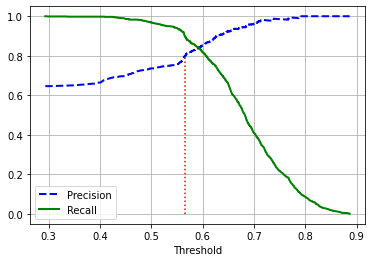

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#next step is to have it capture 90% of all negative comments(which is about )

In [ ]:
plot_precision_recall_vs_threshold(Precision, recalls, thresholds)
#next step is to have it capture 90% of all negative comments(which is about )

NameError: ignored

In [ ]:
for i, thresh in enumerate(thresholds):
  print(thresh, precisions[i], recalls[i])

0.293601649329707 0.6464507236388698 1.0
0.29930510804596844 0.6462068965517241 0.9989339019189766
0.3052624866377801 0.6466528640441684 0.9989339019189766
0.31042865094087363 0.6470994475138122 0.9989339019189766
0.31383733138315945 0.6475466482377332 0.9989339019189766
0.3236183683891565 0.6479944674965422 0.9989339019189766
0.3304810602917525 0.6484429065743945 0.9989339019189766
0.3351525241765593 0.6488919667590027 0.9989339019189766
0.33705691869201526 0.6486486486486487 0.997867803837953
0.34039025202534856 0.6490984743411928 0.997867803837953
0.34516950142423264 0.6495489243580846 0.997867803837953
0.34953180313076676 0.65 0.997867803837953
0.3500609771010216 0.65045170257123 0.997867803837953
0.35059469743432653 0.650904033379694 0.997867803837953
0.35477530981980404 0.651356993736952 0.997867803837953
0.35621796983637904 0.6518105849582173 0.997867803837953
0.3576154948507972 0.6522648083623693 0.997867803837953
0.3601129734455067 0.6527196652719666 0.997867803837953
0.361301

In [ ]:
y_pred_thresh = 1*(y_pred_proba > .565)


In [ ]:
print(classification_report(y_test, y_pred_thresh))

ValueError: ignored

In [ ]:
y_score[:,1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
y_test

9170     negative
1288     negative
1133     negative
11619    negative
7363     negative
           ...   
6568      neutral
5156     positive
10648    negative
5158     positive
8153      neutral
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_test_oh[:,1]

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [ ]:
y_scores[0][:,1]

array([0.5928184 , 0.62953308, 0.55843017, ..., 0.64746358, 0.65481204,
       0.64894293])

In [ ]:
y_scores

[array([[0.37183912, 0.62816088],
        [0.34851095, 0.65148905],
        [0.34556126, 0.65443874],
        ...,
        [0.38370764, 0.61629236],
        [0.43462533, 0.56537467],
        [0.39188161, 0.60811839]]), array([[0.77760225, 0.22239775],
        [0.79213414, 0.20786586],
        [0.78997086, 0.21002914],
        ...,
        [0.77700682, 0.22299318],
        [0.7850022 , 0.2149978 ],
        [0.76449409, 0.23550591]]), array([[0.85055863, 0.14944137],
        [0.85935491, 0.14064509],
        [0.86446788, 0.13553212],
        ...,
        [0.83928554, 0.16071446],
        [0.78037247, 0.21962753],
        [0.84362431, 0.15637569]])]

In [ ]:
y_test_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
type(X_test_w_features)

pandas.core.frame.DataFrame

In [ ]:
y_test_oh_1 = np.array(y_test_oh[:,1])
X_test_w_features_1= np.array(X_test_w_features)

In [ ]:
type(X_test_w_features_1)

numpy.ndarray

In [ ]:
type(y_test_oh_1)

numpy.ndarray

In [ ]:
y_test_oh_1.shape

(1464,)

In [ ]:
X_test_w_features_1.shape

(1464, 10010)

In [ ]:
model

In [ ]:
from sklearn.metrics import classification_report

def precision_recall(modelrf, X_test_w_features, y_test, threshold, beta = 0.5):
    
    y_pred = (modelrf.predict_proba(X_test_w_features)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_test, y_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# pets that were predicted to get adopted and did
    tp = matrix[1,1]# pets that were predicted not to get adopted and didn't
    fp = matrix[0,1]# pets that were predicted not to get adopted but did
    fn = matrix[1,0]# pets that were predicted to get adopted but didn't
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_test, y_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [ ]:
y_test # change neutral to false along with negative being false as well 

1521     negative
6081     positive
9428     negative
12146    negative
6915      neutral
           ...   
1669     negative
590       neutral
7105      neutral
8121     positive
192      negative
Name: airline_sentiment, Length: 1464, dtype: object

In [ ]:
y_pred = (modelrf.predict_proba(X_test_w_features)[:,1] >= 0.38).astype(bool)

print(classification_report(y_test,y_pred))

In [ ]:

threshold_df = pd.df(columns=['Precision','Recall','F0.5_measure'])

for threshold in np.arange(0.1,.9,.02):
    
    threshold_df.loc[threshold] = precision_recall(modelrf, X_test_w_features, y_test, threshold)
 
#print(threshold_df[0.1])

In [ ]:
ax = threshold_df.plot(figsize=(15,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.38, color='black', alpha=0.3)
ax.text(.365,.65,'Optimal Threshold F0.5',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.5, color ='black', alpha = 0.3)
ax.text(.485,.7,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

General NB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df['airline']== df['airline'], 'text'], df.loc[df['airline']== df['airline'], 'airline_sentiment'], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

#print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
#print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))


In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 13176 documents
10010 words in dictionary
Top 5 most common words are: [('flight', 3522), ('not', 1444), ('no', 1361), ('get', 1203), ('t', 1079)]


In [ ]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train.values[0], X_train_seq[0]))
#.values to convert the dataframe 


" check awesome bag flight carry on... Decisions..." is converted into [71, 225, 34, 1, 535, 84, 2292]


In [ ]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[71, 225, 34, 1, 535, 84, 2292]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [ ]:
X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[71, 225, 34, 1, 535, 84, 2292]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 7.0 features with a value of 1.


In [ ]:
#pass only this 
from sklearn.model_selection import KFold
def cv_score(modelrf, X, y, scorefunc):
    result = 0.
    #print("Shape:", X.shape, y.shape)
    nfold = 5
    kf = KFold(n_splits=nfold)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      modelrf.fit(X_train, y_train) # fit the classifier, passed is as clf.
      result += scorefunc(modelrf, X_test, y_test) # evaluate score function on held-out data
    return result / nfold
    #pass only this

In [ ]:
def log_likelihood(modelrf, X, y):
    prob = modelrf.predict_log_proba(X)
    negative = y == 0
    airline_sentiment = ~negative
    return prob[negative, 0].sum() + prob[airline_sentiment, 1].sum()
    #KEEP

In [ ]:
from sklearn.model_selection import train_test_split
_, itest = train_test_split(range(df.shape[0]), train_size=0.7)
mask = np.zeros(df.shape[0], dtype=np.bool)
mask[itest] = True
#KEEP

In [ ]:
def make_xy(df, airline,  vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df= 30)
    X = vectorizer.fit_transform(df.text) #only works on string data, 
    X = X.tocsc()  # some versions of sklearn return COO format
    y = df.airline_sentiment# use label encoding then call this cell 
    return X, y, vectorizer

    #USE THIS ONE

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#use tfid vectorizer 
vectorizer = TfidfVectorizer(min_df= 30)
X, y, vectorizer = make_xy(df[df.airline == df.airline], vectorizer)
#xtrain=X[mask]
#ytrain=y[mask]
#xtest=X[~mask]
#ytest=y[~mask]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

modelrf = MultinomialNB().fit(X_train, y_train)
#best_min_df = trial_min_df

#your turn. Print the accuracy on the test and training dataset
training_accuracy = modelrf.score(X_train, y_train)
test_accuracy = modelrf.score(X_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))
#Accuracy on training data: 0.727231
#Accuracy on test data:     0.704625

#vectorizer the text and then run through it the random forest 

Accuracy on training data: 0.756916
Accuracy on test data:     0.734290


In [ ]:
#try reruning this 
words = np.array(vectorizer.get_feature_names())

x = np.eye(X_test.shape[1])
probs = modelrf.predict_log_proba(x)[:, 1]
ind = np.argsort(probs)

good_words = words[ind[:20]] #try larger number
bad_words = words[ind[-20:]] # try larger number 

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print("positive\t     P(fresh | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    

print("negative\t     P(fresh | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    #try min df 100, 150, 200

positive	     P(fresh | word)
                http 0.44
             airways 0.40
           companion 0.38
                 add 0.38
            question 0.36
            possible 0.31
              winter 0.29
              chance 0.29
             atlanta 0.28
              follow 0.22
negative	     P(fresh | word)
               worst 0.98
          ridiculous 0.97
                hour 0.96
             helpful 0.96
          frustrated 0.96
        unacceptable 0.96
               hours 0.96
                 fix 0.96
                been 0.95
               worse 0.95


In [ ]:
x=[1-np.exp(p) for p in bad_prob]
y=bad_words

In [ ]:
x=[1-np.exp(p) for p in good_prob][:10]
y=good_words[:10]

In [ ]:
x=[1-np.exp(p) for p in good_prob][:10][::-1]
y=good_words[:10][::-1]

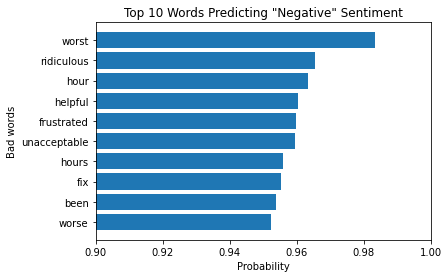

In [ ]:

plt.barh(y, x)

plt.title('Top 10 Words Predicting "Negative" Sentiment')
plt.xlabel('Probability')
plt.ylabel('Bad words')

plt.xlim([.9,1])
plt.show()

In [ ]:
roc_auc_score(y_test_oh,prediction_test_lg )

In [ ]:
np.identity()

In [ ]:
prediction_test = modelrf.predict(X_test_w_features)

In [ ]:
import statsmodels.api as sm
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = sm.add_constant(x)

In [ ]:
results.params

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
rounded_labels=np.argmax(prediction_test, axis=1)
rounded_labels[1]

0

In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.2547814


In [ ]:
from sklearn.metrics import mean_squared_error
#Print the prediction accuracy
print ("mean_squared_error = ", mean_squared_error(y_test_oh, prediction_test))
#Test accuracy for various test sizes and see how it gets better with more training data
#One amazing feature of Random forest is that it provides us info on feature importances

# get the r2 
#mean2 squared error

mean_squared_error =  0.22176684


In [ ]:
print(best_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
y_pred1=modelrf.predict(X_test_oh)

In [ ]:
from sklearn.metrics import R2
from sklearn.metrics import mean_squared_error

ImportError: ignored

In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))


R2 score -0.18910403698116732
RMSE 0.46164355


In [ ]:
print("R2 score",r2_score(y_test_oh,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test_oh,y_pred1)))

NameError: ignored

In [ ]:
print(grid_result.best_score_)


0.8060113368460916
